In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
import openpyxl



In [19]:
# Cargar los archivos de datos
# Ruta relativa a la carpeta de datos
data = pd.read_csv('application_data.csv', delimiter=',')




In [21]:
# Cargar el diccionario de variables
dictionary = pd.read_excel('columns_description.xlsx', engine='openpyxl')
print(dictionary.head())

   Unnamed: 0             Table                 Row  \
0           1  application_data          SK_ID_CURR   
1           2  application_data              TARGET   
2           5  application_data  NAME_CONTRACT_TYPE   
3           6  application_data         CODE_GENDER   
4           7  application_data        FLAG_OWN_CAR   

                                         Description Special  
0                           ID of loan in our sample     NaN  
1  Target variable (1 - client with payment diffi...     NaN  
2        Identification if loan is cash or revolving     NaN  
3                               Gender of the client     NaN  
4                      Flag if the client owns a car     NaN  


In [20]:
#Mostrar las primeras filas para verificar
print(data.head())


   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0             

In [22]:
# Dimensiones del dataset
print("Dimensiones del dataset:")
print(data.shape)

# Tipos de datos
print("\nTipos de datos de las columnas:")
print(data.dtypes)

# Valores nulos
print("\nCantidad de valores nulos por columna:")
print(data.isnull().sum())

Dimensiones del dataset:
(307511, 122)

Tipos de datos de las columnas:
SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

Cantidad de valores nulos por columna:
SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64


#### 1. Dimesiones del data set
- El dataset contiene 307,511 filas (observaciones o registros) y 122 columnas (variables).
- Cada fila representa una persona o cliente, y las columnas son las características asociadas a cada uno.

#### 2. Tipos de datos
- int64: Variables numéricas enteras. Por ejemplo, SK_ID_CURR parece ser un identificador único de cliente y TARGET es el objetivo que estamos tratando de analizar.
- object: Variables categóricas o texto. Por ejemplo, NAME_CONTRACT_TYPE podría indicar el tipo de contrato y CODE_GENDER el género.
- float64 (mostrado más adelante): Variables numéricas decimales, como las solicitudes de crédito (AMT_REQ_CREDIT_BUREAU_DAY).

#### 3. Valores nulos
- Columnas con 0 valores nulos: Estas variables están completas, es decir, no tienen datos faltantes.
    - Ejemplo: SK_ID_CURR, TARGET, CODE_GENDER no tienen valores nulos.
- Columnas con valores nulos (como AMT_REQ_CREDIT_BUREAU_YEAR):
    - Esta columna tiene 41,519 valores nulos, lo que representa una proporción significativa del total.

In [24]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(data.describe())


Estadísticas descriptivas:
          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e

In [25]:
# Relación entre las columnas del dataset y el diccionario
print("\nRelación entre columnas del dataset y diccionario de variables:")
print(dictionary[['Row', 'Description']])


Relación entre columnas del dataset y diccionario de variables:
                           Row  \
0                   SK_ID_CURR   
1                       TARGET   
2           NAME_CONTRACT_TYPE   
3                  CODE_GENDER   
4                 FLAG_OWN_CAR   
..                         ...   
155             DAYS_FIRST_DUE   
156  DAYS_LAST_DUE_1ST_VERSION   
157              DAYS_LAST_DUE   
158           DAYS_TERMINATION   
159  NFLAG_INSURED_ON_APPROVAL   

                                           Description  
0                             ID of loan in our sample  
1    Target variable (1 - client with payment diffi...  
2          Identification if loan is cash or revolving  
3                                 Gender of the client  
4                        Flag if the client owns a car  
..                                                 ...  
155  Relative to application date of current applic...  
156  Relative to application date of current applic...  
157  Relative

In [26]:
# Porcentaje de valores nulos por columna
missing_values = (data.isnull().sum() / len(data)) * 100
missing_values = missing_values[missing_values > 0]  # Filtrar columnas con valores nulos
missing_values = missing_values.sort_values(ascending=False)

print("Porcentaje de valores nulos por columna:")
print(missing_values)


Porcentaje de valores nulos por columna:
COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MEDI    69.432963
NONLIVINGAPARTMENTS_MODE    69.432963
                              ...    
EXT_SOURCE_2                 0.214626
AMT_GOODS_PRICE              0.090403
AMT_ANNUITY                  0.003902
CNT_FAM_MEMBERS              0.000650
DAYS_LAST_PHONE_CHANGE       0.000325
Length: 67, dtype: float64


In [29]:
import plotly
print("Plotly está instalado correctamente. Versión:", plotly.__version__)


Plotly está instalado correctamente. Versión: 5.24.1


Distribución de TARGET:
   TARGET   count    percent
0       0  282686  91.927118
1       1   24825   8.072882


/var/folders/68/dc1ntv914znfn6fky8vvd1yc0000gn/T/ipykernel_28152/1246134499.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_analysis['TARGET'], y=target_analysis['percent'], palette="viridis")


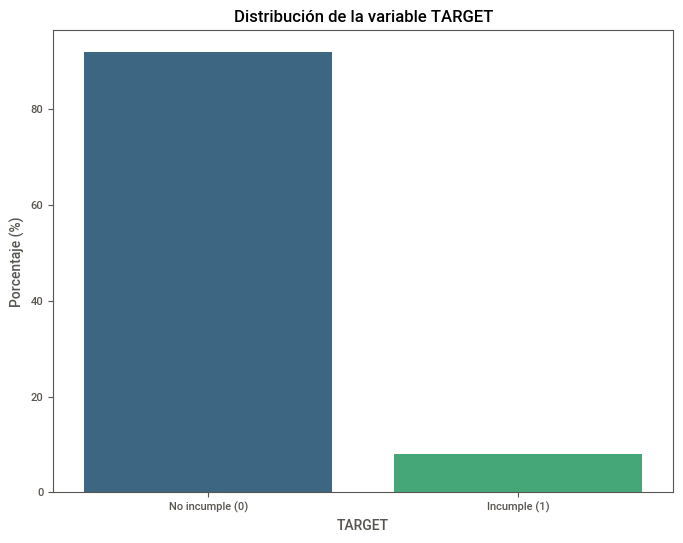

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Proporción y conteo de clases en TARGET
target_distribution = data['TARGET'].value_counts(normalize=True).mul(100).rename('percent')
target_count = data['TARGET'].value_counts()

# Crear un DataFrame para organizar los resultados
target_analysis = pd.DataFrame({
    'TARGET': target_count.index,
    'count': target_count.values,
    'percent': target_distribution.values
})

print("Distribución de TARGET:")
print(target_analysis)

# Gráfico de barras de la distribución de TARGET con Matplotlib
plt.figure(figsize=(8, 6))
sns.barplot(x=target_analysis['TARGET'], y=target_analysis['percent'], palette="viridis")
plt.title("Distribución de la variable TARGET")
plt.xlabel("TARGET")
plt.ylabel("Porcentaje (%)")
plt.xticks([0, 1], ['No incumple (0)', 'Incumple (1)'])
plt.show()

# Gráfico interactivo con Plotly
fig = px.bar(
    target_analysis, x='TARGET', y='percent',
    title="Distribución de la variable TARGET",
    text='percent'
)
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(xaxis=dict(tickmode='array', tickvals=[0, 1], ticktext=['No incumple (0)', 'Incumple (1)']))
fig.show()

La gráfica muestra la distribución de la variable objetivo TARGET, donde se observa que el 91.93% de los clientes no incumplen con sus pagos (TARGET = 0), mientras que solo el 8.07% presentan incumplimiento (TARGET = 1). 

# Selección de threshold por filas y columnas para eliminar valores missing

In [31]:
# Calcular valores nulos por columnas y filas
null_columns = data.isnull().sum().sort_values(ascending=False)  # Valores nulos por columna
null_rows = data.isnull().sum(axis=1).sort_values(ascending=False)  # Valores nulos por fila

# Mostrar las dimensiones
print(f"Dimensiones de valores nulos por columnas: {null_columns.shape}")
print(f"Dimensiones de valores nulos por filas: {null_rows.shape}")

# Crear DataFrames para análisis
null_columns_df = pd.DataFrame(null_columns, columns=['nulos_columnas'])
null_rows_df = pd.DataFrame(null_rows, columns=['nulos_filas'])

# Agregar porcentaje de nulos
null_columns_df['porcentaje_columnas'] = null_columns_df['nulos_columnas'] / data.shape[0]
null_rows_df['porcentaje_filas'] = null_rows_df['nulos_filas'] / data.shape[1]

# Si deseas agregar información sobre TARGET a las filas:
null_rows_df['TARGET'] = data['TARGET'].copy()

# Mostrar resultados
print("Valores nulos por columnas (ordenado):")
print(null_columns_df)

print("\nValores nulos por filas (ordenado):")
print(null_rows_df)

Dimensiones de valores nulos por columnas: (122,)
Dimensiones de valores nulos por filas: (307511,)
Valores nulos por columnas (ordenado):
                          nulos_columnas  porcentaje_columnas
COMMONAREA_MEDI                   214865             0.698723
COMMONAREA_AVG                    214865             0.698723
COMMONAREA_MODE                   214865             0.698723
NONLIVINGAPARTMENTS_MODE          213514             0.694330
NONLIVINGAPARTMENTS_AVG           213514             0.694330
...                                  ...                  ...
NAME_HOUSING_TYPE                      0             0.000000
NAME_FAMILY_STATUS                     0             0.000000
NAME_EDUCATION_TYPE                    0             0.000000
NAME_INCOME_TYPE                       0             0.000000
SK_ID_CURR                             0             0.000000

[122 rows x 2 columns]

Valores nulos por filas (ordenado):
        nulos_filas  porcentaje_filas  TARGET
185713    

**Selección de threshold por filas y columnas para valores nulos**

El análisis de los valores nulos revela lo siguiente:

__Por columnas:__

Existen 122 columnas en el dataset, de las cuales varias tienen un porcentaje significativo de valores nulos.

Las columnas COMMONAREA_MED, COMMONAREA_AVG y COMMONAREA_MODE presentan cerca del 69.87% de valores faltantes, lo que las hace candidatas para ser eliminadas o imputadas según su relevancia en el análisis.

Algunas columnas, como NAME_HOUSING_TYPE y NAME_EDUCATION_TYPE, no presentan valores nulos y están completas.
Por filas:

Hay 307,511 filas en el dataset, y un número considerable tiene hasta un 50% de sus valores faltantes.

Esto podría indicar la necesidad de aplicar un threshold para eliminar estas filas, especialmente si contienen poca información relevante.
Relevancia de TARGET en las filas con nulos:

Se incluyó la variable TARGET para observar cómo se distribuyen los valores faltantes en relación con la variable objetivo. Esto permitirá evaluar si las filas con más nulos tienen una relación significativa con el incumplimiento (TARGET = 1).


In [35]:
# Threshold (umbral) para eliminar columnas y filas
threshold_columnas = 0.50  # Eliminar columnas con más del 50% de valores nulos
threshold_filas = 0.50     # Eliminar filas con más del 50% de valores nulos

# Identificar columnas que superan el threshold
columnas_a_eliminar = null_columns_df[null_columns_df['porcentaje_columnas'] > threshold_columnas]
print(f"Columnas con más del {threshold_columnas*100}% de valores nulos:")
print(columnas_a_eliminar)

# Identificar filas que superan el threshold
filas_a_eliminar = null_rows_df[null_rows_df['porcentaje_filas'] > threshold_filas]
print(f"\nFilas con más del {threshold_filas*100}% de valores nulos:")
print(filas_a_eliminar)

# Eliminar columnas y filas según el threshold
data_cleaned = data.drop(columns=columnas_a_eliminar.index)  # Eliminar columnas
data_cleaned = data_cleaned.drop(filas_a_eliminar.index, axis=0)  # Eliminar filas

# Mostrar dimensiones después de limpiar
print("\nDimensiones originales del dataset:", data.shape)
print("Dimensiones después de limpiar:", data_cleaned.shape)

Columnas con más del 50.0% de valores nulos:
                          nulos_columnas  porcentaje_columnas
COMMONAREA_MEDI                   214865             0.698723
COMMONAREA_AVG                    214865             0.698723
COMMONAREA_MODE                   214865             0.698723
NONLIVINGAPARTMENTS_MODE          213514             0.694330
NONLIVINGAPARTMENTS_AVG           213514             0.694330
NONLIVINGAPARTMENTS_MEDI          213514             0.694330
FONDKAPREMONT_MODE                210295             0.683862
LIVINGAPARTMENTS_MODE             210199             0.683550
LIVINGAPARTMENTS_AVG              210199             0.683550
LIVINGAPARTMENTS_MEDI             210199             0.683550
FLOORSMIN_AVG                     208642             0.678486
FLOORSMIN_MODE                    208642             0.678486
FLOORSMIN_MEDI                    208642             0.678486
YEARS_BUILD_MEDI                  204488             0.664978
YEARS_BUILD_MODE         

**Eliminación de valores nulos según threshold**

Se aplicó un umbral del 50% tanto para columnas como para filas con valores nulos, obteniendo los siguientes resultados:

__Columnas eliminadas:__

Un total de 41 columnas fueron eliminadas del dataset, ya que más del 50% de sus valores eran nulos.

Entre las columnas eliminadas se encuentran COMMONAREA_MED, COMMONAREA_AVG y NONLIVINGAPARTMENTS_MODE, que presentaban un ~69% de valores faltantes. Estas variables probablemente contenían poca información útil debido a la gran cantidad de datos ausentes.
Filas eliminadas:

No se eliminó ninguna fila, ya que ninguna fila superó el umbral del 50% de valores faltantes.
Dimensiones del dataset:

Las dimensiones originales del dataset eran (307,511 filas x 122 columnas).
Después de la limpieza, el dataset quedó reducido a (307,511 filas x 81 columnas), eliminando únicamente las columnas con demasiados valores nulos.



## __Identificar variables categóricas y numéricas__ ##

In [38]:
# Identificar variables categóricas y numéricas
categorical_vars = data_cleaned.select_dtypes(include=['object']).columns.tolist()
numerical_vars = data_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Variables categóricas:")
print(categorical_vars)

print("\nVariables numéricas:")
print(numerical_vars)


Variables categóricas:
[]

Variables numéricas:
['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3'

## __Convertir variables categóricas a tipo category__ ##

In [39]:
# Convertir variables categóricas a tipo 'category'
data_cleaned[categorical_vars] = data_cleaned[categorical_vars].astype('category')

# Verificar los tipos de datos después de la conversión
print("\nTipos de datos después de la conversión:")
print(data_cleaned[categorical_vars].dtypes)



Tipos de datos después de la conversión:
Series([], dtype: object)


## __Ver valores únicos en variables categóricas__ ##

In [40]:
# Ver valores únicos de cada variable categórica
for var in categorical_vars:
    print(f"\nValores únicos en la variable '{var}':")
    print(data_cleaned[var].value_counts())


## __Analizar variables categóricas clave__ ##


Distribución de CODE_GENDER:
CODE_GENDER
F      65.834393
M      34.164306
XNA     0.001301
Name: proportion, dtype: float64


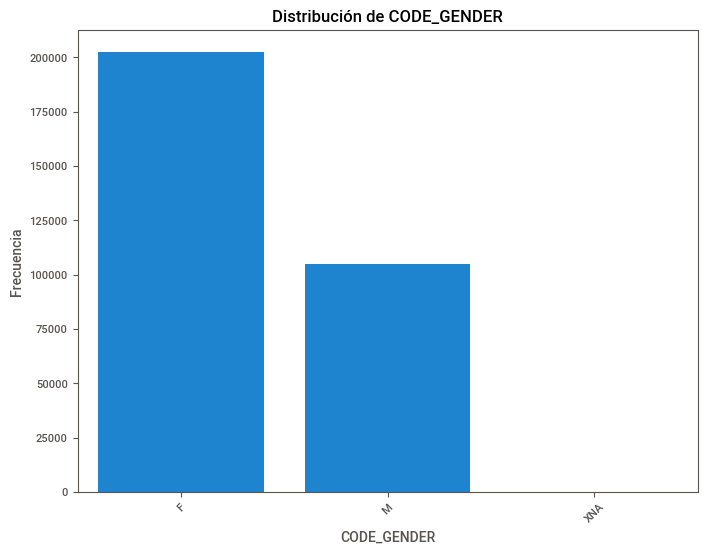


Distribución de NAME_CONTRACT_TYPE:
NAME_CONTRACT_TYPE
Cash loans         90.478715
Revolving loans     9.521285
Name: proportion, dtype: float64


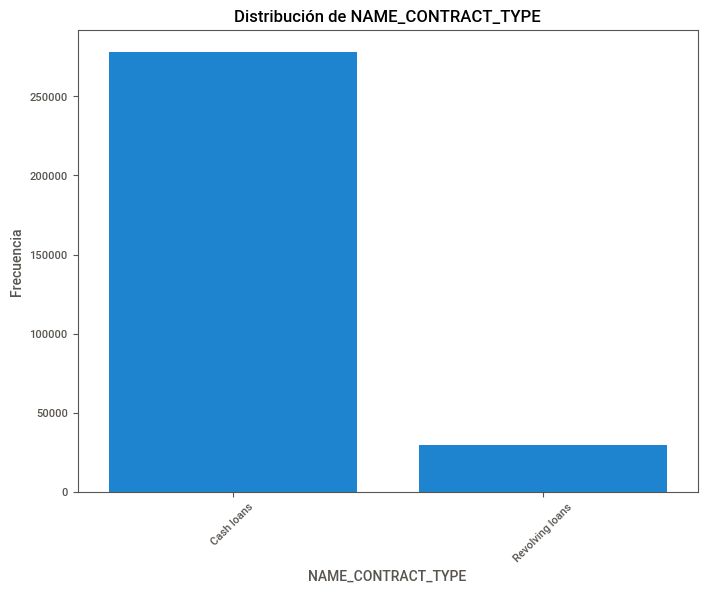


Distribución de NAME_EDUCATION_TYPE:
NAME_EDUCATION_TYPE
Secondary / secondary special    71.018923
Higher education                 24.344820
Incomplete higher                 3.341994
Lower secondary                   1.240931
Academic degree                   0.053331
Name: proportion, dtype: float64


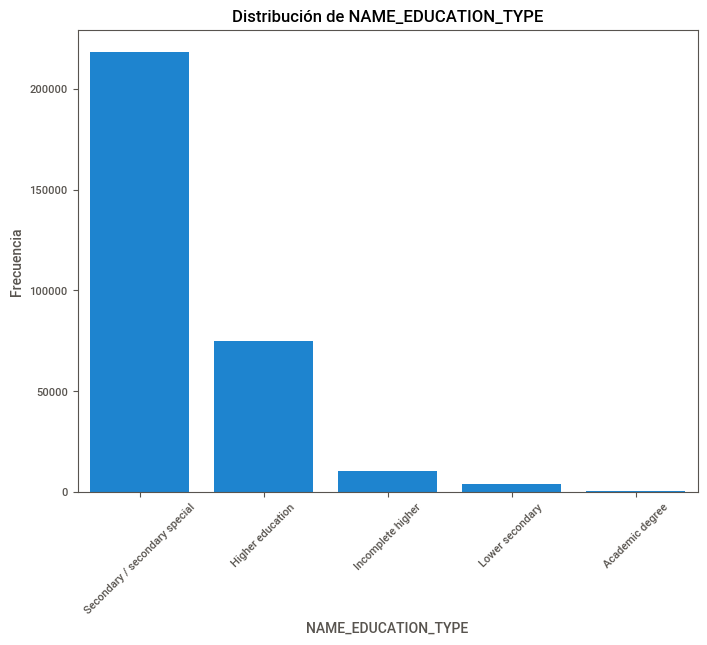


Distribución de OCCUPATION_TYPE:
OCCUPATION_TYPE
Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: proportion, dtype: float64


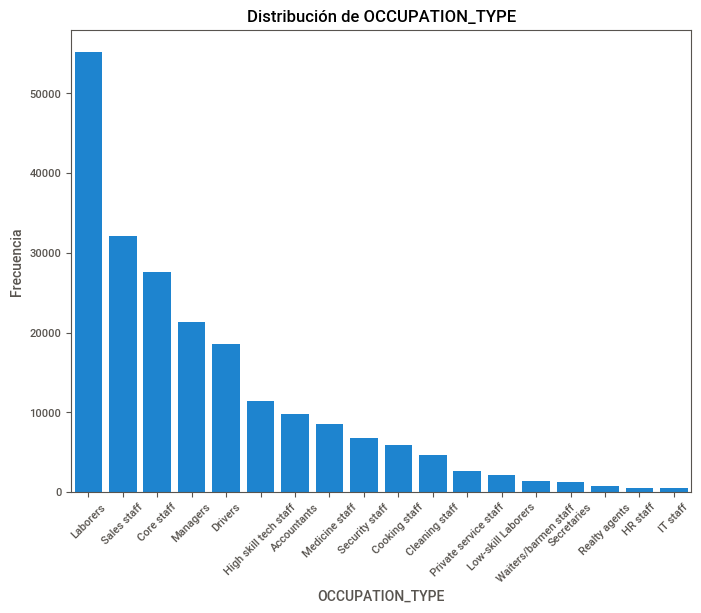

In [41]:
# Analizar distribución de más variables categóricas relevantes
variables_a_analizar = ['CODE_GENDER', 'NAME_CONTRACT_TYPE', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE']

for var in variables_a_analizar:
    print(f"\nDistribución de {var}:")
    print(data_cleaned[var].value_counts(normalize=True) * 100)

    # Gráfico para cada variable
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data_cleaned, x=var, order=data_cleaned[var].value_counts().index)
    plt.title(f"Distribución de {var}")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)
    plt.show()


### *Explicaciones de cada gráfico para incluir en tu informe*

#### *Gráfico 1: Distribución de CODE_GENDER*
El gráfico muestra la distribución del género (CODE_GENDER) de los clientes:
- La mayoría de los clientes son mujeres (*65.83%), mientras que los hombres representan el **34.16%*.
- Hay un número insignificante de valores registrados como XNA (*0.001%*), lo cual podría representar errores de registro o valores irrelevantes.
- Esta variable es importante porque puede revelar diferencias significativas en el comportamiento crediticio entre géneros, que podrían influir en el modelo predictivo.

---

#### *Gráfico 2: Distribución de NAME_CONTRACT_TYPE*
Este gráfico muestra la proporción de tipos de contrato en el dataset:
- El *90.48%* de los contratos son préstamos en efectivo (Cash loans), mientras que el *9.52%* son préstamos renovables (Revolving loans).
- Esta variable es relevante porque diferentes tipos de contratos pueden implicar riesgos distintos. Por ejemplo, los préstamos en efectivo suelen tener montos más altos, mientras que los préstamos renovables tienden a ser líneas de crédito continuas.

---

#### *Gráfico 3: Distribución de NAME_EDUCATION_TYPE*
La gráfica ilustra el nivel educativo de los clientes:
- La mayoría tiene un nivel de *educación secundaria o secundaria especial* (*71.02%), seguido de **educación superior* (*24.34%*).
- Los niveles más bajos, como *educación secundaria incompleta* (3.34%) o *grado académico avanzado* (0.05%), representan una minoría.
- Esta variable es crucial, ya que el nivel educativo puede estar relacionado con la capacidad de pago y el acceso a mejores oportunidades financieras.

---

#### *Gráfico 4: Distribución de OCCUPATION_TYPE*
Este gráfico detalla las ocupaciones de los clientes:
- Los grupos más representados son *trabajadores* (Laborers, *26.14%), seguido del personal de ventas (Sales staff, **15.20%) y el personal administrativo (Core staff, **13.06%*).
- Las ocupaciones menos representadas incluyen personal de recursos humanos (HR staff, *0.27%) y tecnología de la información (IT staff, **0.25%*).
- La ocupación de un cliente puede reflejar su estabilidad laboral y capacidad de generar ingresos, factores críticos en la evaluación de riesgo crediticio.

---

### *Explicación: ¿Por qué se eligieron estas 4 variables?*

1. *Relevancia en el contexto financiero:*
   - Estas variables son indicadores importantes del perfil del cliente y su potencial comportamiento de pago.
   - Por ejemplo, variables como el género (CODE_GENDER) o la ocupación (OCCUPATION_TYPE) pueden estar correlacionadas con el riesgo de incumplimiento (TARGET).

2. *Diversidad de información:*
   - Cada una de estas variables ofrece una perspectiva única:
     - CODE_GENDER: Información demográfica.
     - NAME_CONTRACT_TYPE: Información sobre el tipo de producto financiero.
     - NAME_EDUCATION_TYPE: Información sobre el nivel educativo del cliente.
     - OCCUPATION_TYPE: Información sobre la estabilidad laboral y nivel de ingresos.

3. *Impacto potencial en los modelos:*
   - Estas variables suelen ser incluidas en modelos de scoring crediticio porque ayudan a segmentar los clientes según sus características clave.

4. *Facilidad de interpretación:*
   - Estas variables tienen pocas categorías (excepto OCCUPATION_TYPE), lo que facilita interpretar su impacto en el análisis.

---



## __Analizar variables numéricas__ ##

In [42]:
# Describir estadísticas de variables numéricas
print("\nEstadísticas descriptivas de las variables numéricas:")
print(data_cleaned[numerical_vars].describe())



Estadísticas descriptivas de las variables numéricas:
          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05  

## Preprocesamiento inicial de algunas variables

In [43]:
# Listar todas las columnas del dataset
print("Columnas en el dataset:")
print(data_cleaned.columns.tolist())

Columnas en el dataset:
['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUAT

In [44]:
# Convertir días a años para facilitar la interpretación
columns_days_to_years = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']

for col in columns_days_to_years:
    if col in data_cleaned.columns:
        data_cleaned[col + '_YEARS'] = (data_cleaned[col] / -365).round(1)  # Dividir entre -365 para años

# Verificar los resultados
print("Transformación de días a años completada:")
print(data_cleaned[[col + '_YEARS' for col in columns_days_to_years]].head())

Transformación de días a años completada:
   DAYS_BIRTH_YEARS  DAYS_EMPLOYED_YEARS  DAYS_REGISTRATION_YEARS  \
0              25.9                  1.7                     10.0   
1              45.9                  3.3                      3.2   
2              52.2                  0.6                     11.7   
3              52.1                  8.3                     26.9   
4              54.6                  8.3                     11.8   

   DAYS_ID_PUBLISH_YEARS  
0                    5.8  
1                    0.8  
2                    6.9  
3                    6.7  
4                    9.5  


In [45]:
# Verificar columnas financieras
columns_financial = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

print("Ejemplo de columnas financieras:")
print(data_cleaned[columns_financial].describe())

Ejemplo de columnas financieras:
       AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE
count      3.075110e+05  3.075110e+05  307499.000000     3.072330e+05
mean       1.687979e+05  5.990260e+05   27108.573909     5.383962e+05
std        2.371231e+05  4.024908e+05   14493.737315     3.694465e+05
min        2.565000e+04  4.500000e+04    1615.500000     4.050000e+04
25%        1.125000e+05  2.700000e+05   16524.000000     2.385000e+05
50%        1.471500e+05  5.135310e+05   24903.000000     4.500000e+05
75%        2.025000e+05  8.086500e+05   34596.000000     6.795000e+05
max        1.170000e+08  4.050000e+06  258025.500000     4.050000e+06


In [46]:
# Asegurar que las columnas categóricas estén correctamente codificadas
categorical_columns = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 
                       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'EMERGENCYSTATE_MODE']

for col in categorical_columns:
    if col in data_cleaned.columns:
        data_cleaned[col] = data_cleaned[col].astype('category')

# Verificar los cambios
print("Transformación de columnas categóricas completada:")
print(data_cleaned[categorical_columns].dtypes)

Transformación de columnas categóricas completada:
NAME_CONTRACT_TYPE     category
CODE_GENDER            category
FLAG_OWN_CAR           category
FLAG_OWN_REALTY        category
NAME_INCOME_TYPE       category
NAME_EDUCATION_TYPE    category
NAME_FAMILY_STATUS     category
NAME_HOUSING_TYPE      category
OCCUPATION_TYPE        category
EMERGENCYSTATE_MODE    category
dtype: object


In [ ]:
# Guardar el dataset actualizado
import os

output_dir = "data_preprocessing"
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, "data_cleaned_transformed.csv")

data_cleaned.to_csv(output_path, index=False)
print(f"Dataset preprocesado guardado en: {output_path}")

Dataset preprocesado guardado en: data_preprocessing/data_cleaned_transformed.csv
